<a href="https://colab.research.google.com/github/ankit-thealchemist/tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras


In [24]:
import tensorflow.keras.layers as layers

In [ ]:
print(tf.__version__)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
print (class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [16]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
print("x_train shape:", train_images.shape, "y_train shape:",train_labels.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


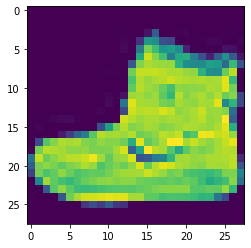

In [19]:
plt.imshow(train_images[0])

In [20]:
train_images = train_images.astype('float')/255
test_images = test_images.astype('float')/255

In [23]:
model = keras.Sequential(name="fashionMnist")

In [25]:
model.add(layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(layers.MaxPooling2D(pool_size=2))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(layers.Dropout(.03))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(layers.Conv2D(filters=32,kernel_size=2,activation='relu',padding='same'))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
Total params: 8,544
Trainable params: 8,544
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.add(layers.MaxPooling2D(pool_size=2))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 8,544
Trainable params: 8,544
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(layers.Dropout(.3))

In [33]:
model.add(layers.Flatten())
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [34]:
model.add(layers.Dense(256,activation='relu'))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [36]:
model.add(layers.Dropout(.5))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [37]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "fashionMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [39]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy']
)

In [42]:
valid_images = .1 * train_images.shape
print(valid_images)

TypeError: ignored